In [1]:
%matplotlib inline

In [2]:
from kid_readout.measurement.io import npy

In [3]:
figure_directory = '/home/flanigan/temp/'

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-04-17_150849_scan.npd/')

In [5]:
scan = npd.Scan0
snaps = [npd.read(name) for name in npd.node_names() if name.startswith('ADCSnap')]

In [6]:
len(scan.sweep_arrays)

6

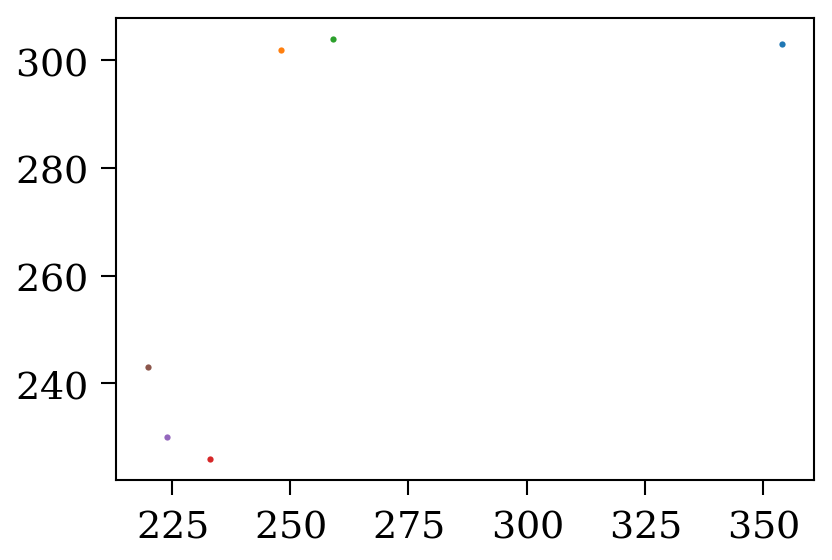

In [7]:
fig, ax = plt.subplots()
for snap in snaps:
    ax.plot(snap.x.ptp(), snap.y.ptp(), '.')

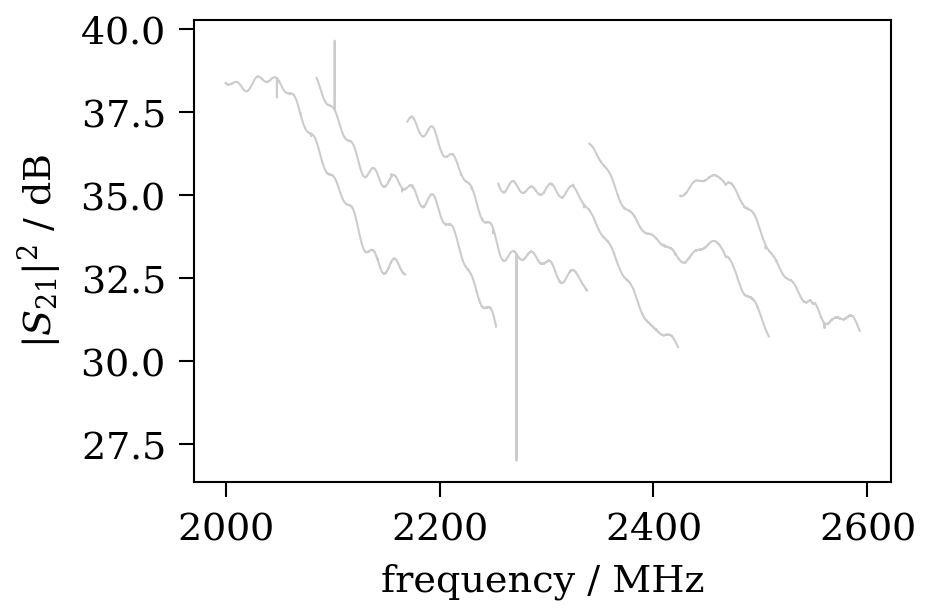

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$|S_{21}|^2$ / dB')

for sweep in scan.sweep_arrays:
    ax.plot(sweep.frequency_MHz, 20 * np.log10(np.abs(sweep.s21_point)), '-k', alpha=0.2)

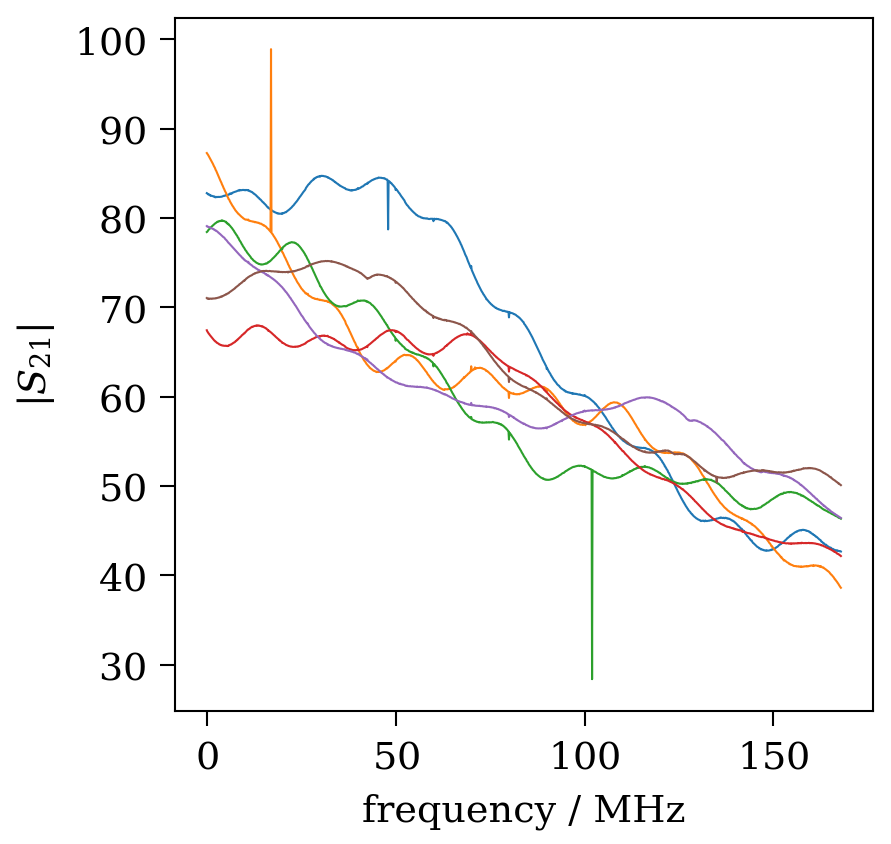

In [9]:
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlabel('frequency / MHz')
ax.set_ylabel('$|S_{21}|$')

for n, sweep in enumerate(scan.sweep_arrays):
    ax.plot(sweep.frequency_MHz - sweep.frequency_MHz.min(), 3 * n + np.abs(sweep.s21_point))

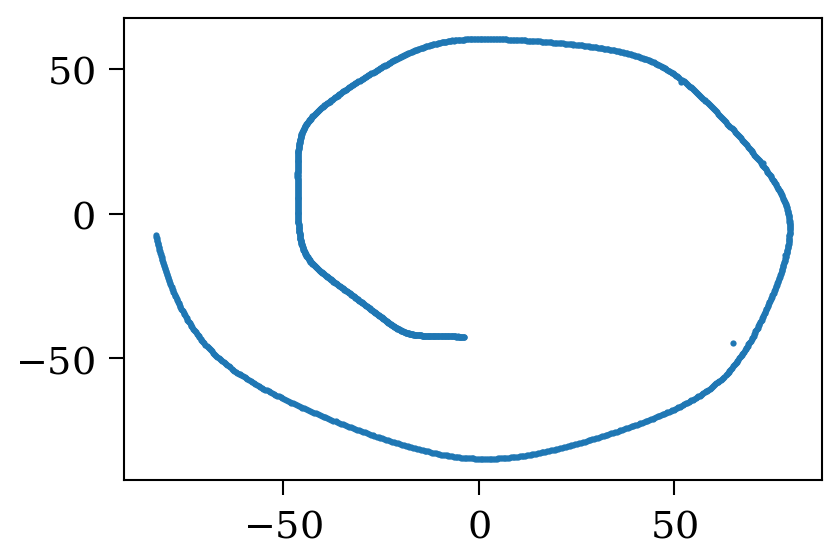

In [10]:
fig, ax = plt.subplots()
ax.plot(scan.sweep_arrays[0].s21_point.real, scan.sweep_arrays[0].s21_point.imag, '.')